#### Import Required Files

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

from umap import UMAP

import seaborn as sns
import matplotlib.pyplot as plt

from LANDMark import LANDMarkClassifier

d:\miniconda3\envs\testLM\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\miniconda3\envs\testLM\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
d:\miniconda3\envs\testLM\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' ke

#### Load data

In [2]:
X, y = load_breast_cancer(return_X_y = True)

#### Split into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
         X, 
         y, 
         test_size=0.2, 
         random_state=0, 
         stratify=y)

#### Standardize data

In [5]:
trf = StandardScaler().fit(X_train)

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

#### Setup model and train. Note, to obtain the best score cross-validation of relevant hyper-parameters should be performed. This is just a simple example.

In [9]:
clf = LANDMarkClassifier(n_estimators = 16, n_jobs = 4, min_samples_in_leaf = 2, use_cascade = True, minority_sz_nnet = 24)
clf.fit(X_train, y_train)

LANDMarkClassifier(min_samples_in_leaf=2, minority_sz_nnet=24, n_estimators=16,
                   use_cascade=True)

#### Calculate balanced accuracy score

In [10]:
BAcc = clf.score(X_test, y_test)
print(BAcc)

0.9692460317460317


#### We can visualize the output of each sample using LANDMark's proximities and UMAP. Note, this projection is constrained using the class labels. Another notebook will describe how to create an unsupervised projection of LANDMark proximities.

d:\miniconda3\envs\testLM\Lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


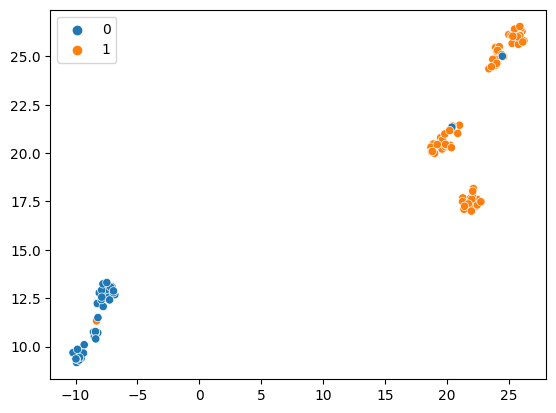

In [11]:
prox = clf.proximity(X_test)

X_test_umap = UMAP(metric = "hamming").fit_transform(prox)

sns.scatterplot(x = X_test_umap[:, 0],
                y = X_test_umap[:, 1],
                hue = y_test)

plt.show()
plt.close()